In [31]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data: 09.12.2018
# Autorzy: Mariusz Czarny
#########################################################################################################################

In [32]:
# import wewenętrznej bazy danych
import sqlite3

In [33]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [34]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [35]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [36]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [37]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [38]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Subscribers"]

In [39]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [46]:
dateDiffQuery = '''SELECT start_date, COUNT(*) as numstarts, SUM(CASE WHEN stop_type IS NULL THEN 1 ELSE 0 END ) as numactives, AVG(CASE WHEN stop_type IS NULL THEN 1.0 ELSE 0 END ) retention FROM subscribers WHERE start_date >= '2004-01-01' AND tenure >= 0 GROUP BY start_date ORDER BY 1'''
dateDF = pd.read_sql_query(dateDiffQuery, dbConnection)

In [47]:
dateDF.head()

,start_date,numstarts,numactives,retention
0,2004-01-01,349,77,0.220630
1,2004-01-02,3062,861,0.281189
2,2004-01-03,2865,812,0.283421
3,2004-01-04,2653,736,0.277422
4,2004-01-05,2561,720,0.281140


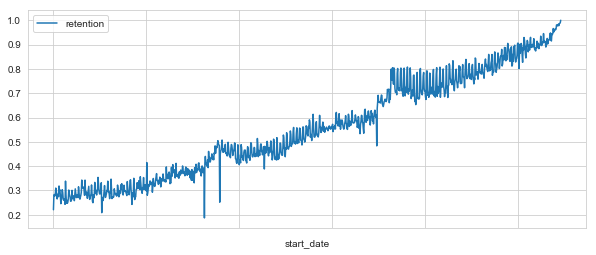

In [48]:
# rysowanie wykresu
dateDF.plot(x='start_date', y='retention', legend=True,figsize=(10,4))